In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib_inline.backend_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.style.use('./aux-files/custom_style_light.mplstyle')
blue = '#486AFB'
magenta = '#FD46FC'

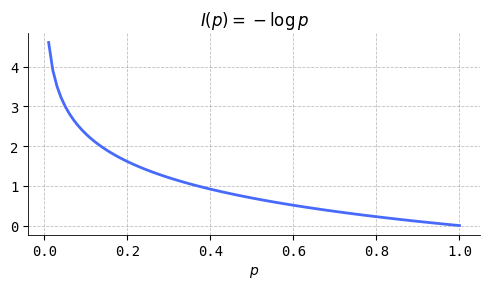

In [3]:
grid = np.linspace(0.01, 1, 100)
plt.plot(grid, -np.log(grid))
plt.xlabel('$p$')
plt.title('$I(p) = -\\log{p}$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
plt.savefig('/Users/johnmyers/Desktop/surprisal.pdf')

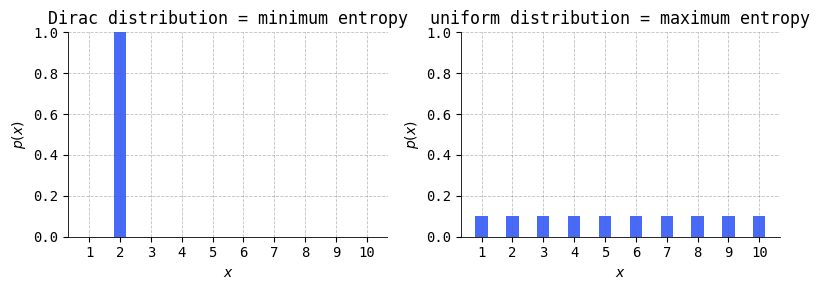

In [4]:
grid = range(1, 11)
spike = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
uniform = [0.1] * 10

_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharex=True)

axes[0].bar(grid, spike, width=0.4)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$p(x)$')
axes[0].set_xticks(range(1, 11))
axes[0].set_ylim(0, 1)
axes[0].set_title('Dirac distribution = minimum entropy')
axes[1].bar(grid, uniform, width=0.4)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_ylim(0, 1)
axes[1].set_title('uniform distribution = maximum entropy')
plt.tight_layout()
plt.savefig('/Users/johnmyers/Desktop/extreme-entropy.pdf')

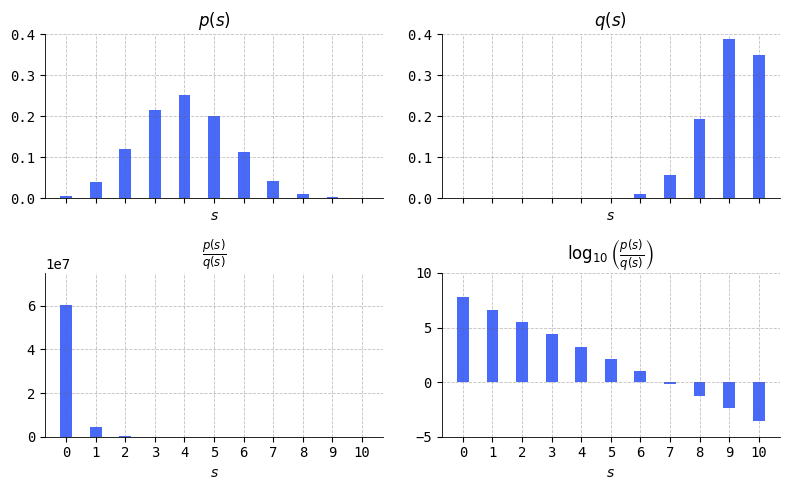

In [4]:
grid = np.arange(0, 11)
p = sp.stats.binom(n=10, p=0.4).pmf(grid)
q = sp.stats.binom(n=10, p=0.9).pmf(grid)
titles = ['$p(s)$',
          '$q(s)$',
          '$\\frac{p(s)}{q(s)}$',
          '$\\log_{10}\\left(\\frac{p(s)}{q(s)}\\right)$']
probs = [p,
         q,
         p / q,
         np.log10(p / q)]
ylims = [(0, 0.4),
         (0, 0.4),
         (-50, 0.75e8),
         (-5, 10)]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 5), sharex=True)

for title, prob, ylim, axis in zip(titles, probs, ylims, axes.flatten()):
    axis.bar(grid, prob, width=0.4)
    axis.set_xticks(ticks=grid)
    axis.set_ylim(ylim)
    axis.set_title(title)
    axis.set_xlabel('$s$')

plt.tight_layout()
plt.savefig('/Users/johnmyers/Desktop/rel-mag.pdf')

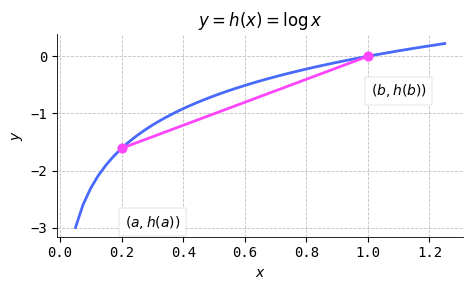

In [5]:
grid = np.linspace(0.05, 1.25)
grid_line = np.linspace(0.2, 1)
m = -np.log(0.2) / 0.8 

plt.plot(grid, np.log(grid))
plt.plot(grid_line, m * (grid_line - 1))
plt.scatter(0.2, np.log(0.2), s=50, color=magenta, zorder=2)
plt.scatter(1, 0, s=50, color=magenta, zorder=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y=h(x) = \\log{x}$')
plt.gcf().set_size_inches(w=5, h=3)
plt.text(0.3, -2.9, '$(a,h(a))$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(1.1, -0.6, '$(b,h(b))$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.tight_layout()
plt.savefig('/Users/johnmyers/Desktop/concave.pdf')

In [6]:
# given
p_yCx = np.array([[0.8, 0.2],
                 [0.1, 0.9]])

p_zCy = np.array([[0.25, 0.75],
                 [0.95, 0.05]])

p_x = np.array([0.99, 0.01])

# derived
p_xy = p_yCx * p_x.reshape(2, 1)
p_xz = np.tensordot(p_yCx, p_zCy, axes=1) * p_x.reshape(2, 1)
p_y = np.sum(p_xy, axis=0)
p_z = np.sum(p_xz, axis=0)

print(sp.stats.entropy(pk=p_xy, qk=np.outer(p_x, p_y), base=2, axis=None))
print(sp.stats.entropy(pk=p_xz, qk=np.outer(p_x, p_z), base=2, axis=None))

0.016310309412090305
0.007443835585872916


In [7]:
p_xy = np.array([[0.3, 0.1],
                 [0.36, 0.24]])

p_x = np.sum(p_xy, axis=1)
p_y = np.sum(p_xy, axis=0)

sp.stats.entropy(pk=p_xy, qk=np.outer(p_x, p_y), axis=None)

0.01229441982807825